In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_9608/1486511598.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


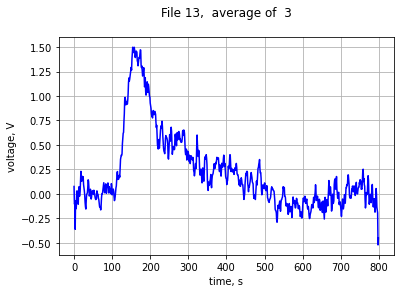

In [2]:
filename = './approximation/13.asc'
with open(filename, 'r', encoding='utf-8') as inf:
    title = inf.readline()
    v = [float(_.strip()) for _ in inf.readlines()]
n = len(v)
v = np.array(v)
t = np.linspace(0, (n - 1), n)
fig, ax = plt.subplots()
ax.plot(t, v, 'b')
ax.set_xlabel('time, s')
ax.set_ylabel('voltage, V')
ax.set_title(title)
ax.grid()
fig.show()